In [2]:
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset


In [3]:
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MLP, self).__init__()
        
        # Define the layers
        self.fc1 = nn.Linear(input_size, hidden_size)  # First fully connected layer
        self.relu = nn.ReLU()  # ReLU activation function
        self.fc2 = nn.Linear(hidden_size, output_size)  # Output layer
    
    def forward(self, x):
        # Define the forward pass
        x = self.fc1(x)  # Pass through the first layer
        x = self.relu(x)  # Apply ReLU activation
        x = self.fc2(x)  # Pass through the output layer
        return x


In [4]:
# Example dataset (random data for illustration)
X_train = torch.randn(100, 10)  # 100 samples, 10 features each
y_train = torch.randint(0, 2, (100, 1))  # Binary labels (0 or 1)

# Create a DataLoader for batch processing
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)


In [5]:
# Hyperparameters
input_size = 10  # Number of input features
hidden_size = 64  # Number of neurons in the hidden layer
output_size = 1  # Output size (binary classification)
learning_rate = 0.001  # Learning rate for Adam optimizer

# Instantiate the model
model = MLP(input_size, hidden_size, output_size)

# Loss function and optimizer
criterion = nn.BCEWithLogitsLoss()  # Suitable for binary classification
optimizer = optim.Adam(model.parameters(), lr=learning_rate)


In [11]:
loss = criterion(outputs.squeeze(), labels.squeeze().float())



In [12]:
for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    
    running_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()  # Zero out the gradients from the previous step
        
        # Forward pass
        outputs = model(inputs.float())
        
        # Calculate the loss (squeeze labels)
        loss = criterion(outputs.squeeze(), labels.squeeze().float())
        
        # Backward pass
        loss.backward()
        
        # Update weights
        optimizer.step()
        
        running_loss += loss.item()
    
    epoch_loss = running_loss / len(train_loader)
    train_losses.append(epoch_loss)  # Store loss per epoch
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss}")


Epoch [1/20], Loss: 0.6600060015916824
Epoch [2/20], Loss: 0.6572560667991638
Epoch [3/20], Loss: 0.6425119936466217
Epoch [4/20], Loss: 0.6411485970020294
Epoch [5/20], Loss: 0.6467691957950592
Epoch [6/20], Loss: 0.6385151594877243
Epoch [7/20], Loss: 0.6119986921548843
Epoch [8/20], Loss: 0.6646713018417358
Epoch [9/20], Loss: 0.6306479275226593
Epoch [10/20], Loss: 0.6162822395563126
Epoch [11/20], Loss: 0.6720652878284454
Epoch [12/20], Loss: 0.5867582559585571
Epoch [13/20], Loss: 0.6576058864593506
Epoch [14/20], Loss: 0.6348621249198914
Epoch [15/20], Loss: 0.6691545695066452
Epoch [16/20], Loss: 0.6401044577360153
Epoch [17/20], Loss: 0.6293485462665558
Epoch [18/20], Loss: 0.6427244246006012
Epoch [19/20], Loss: 0.6041591912508011
Epoch [20/20], Loss: 0.6180805265903473


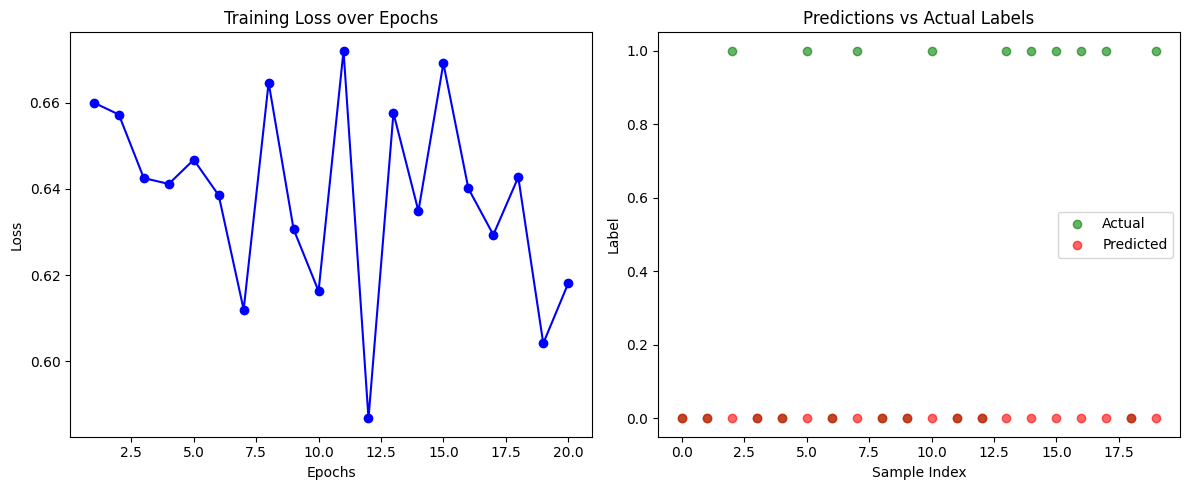

In [13]:
# Example evaluation (assuming a test dataset is available)
X_test = torch.randn(20, 10)
y_test = torch.randint(0, 2, (20, 1))

model.eval()  # Set the model to evaluation mode
with torch.no_grad():
    outputs = model(X_test.float())
    predicted = torch.round(torch.sigmoid(outputs))  # Apply sigmoid to get predictions

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot 1: Loss vs Epochs
axes[0].plot(range(1, num_epochs + 1), train_losses, marker='o', color='blue')
axes[0].set_title('Training Loss over Epochs')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Loss')

# Plot 2: Predictions vs Actual Labels
axes[1].scatter(range(len(y_test)), y_test.numpy(), label='Actual', color='green', alpha=0.6)
axes[1].scatter(range(len(predicted)), predicted.numpy(), label='Predicted', color='red', alpha=0.6)
axes[1].set_title('Predictions vs Actual Labels')
axes[1].set_xlabel('Sample Index')
axes[1].set_ylabel('Label')
axes[1].legend()

plt.tight_layout()
plt.show()
